In [276]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#series = pd.read_csv(r'time_series_data.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
dataset = pd.read_csv('time_series_data.csv')
dataset['Date']=pd.to_datetime(dataset['Date'],infer_datetime_format=True)
 

In [277]:
indexedDataset=dataset.set_index(['Date'])

In [278]:
indexedDataset.head()

,Withdrawl_Amount
Date,
2015-01-01,0.00
2015-02-01,5500056.18
2015-03-01,2200000.00
2015-04-01,0.00
2015-05-01,3231000.00


In [279]:
indexedDataset.tail()

,Withdrawl_Amount
Date,
2019-01-03,4532396.00
2019-02-03,12633316.00
2019-03-03,0.00
2019-04-03,4800000.00
2019-05-03,11694712.08


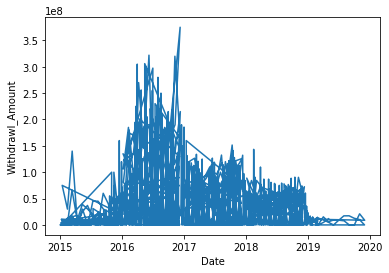

In [280]:
##plot graph
plt.xlabel('Date')
plt.ylabel('Withdrawl_Amount')
plt.plot(indexedDataset)
#plt.show()



#data is quite irredular in nature

In [281]:
#determining rolling statstic
#rollmean
rolmean=indexedDataset.rolling(window=30).mean()
#roll std
rolstd=indexedDataset.rolling(window=30).std()

print(rolmean,rolstd)

            Withdrawl_Amount
Date                        
2015-01-01               NaN
2015-02-01               NaN
2015-03-01               NaN
2015-04-01               NaN
2015-05-01               NaN
...                      ...
2019-01-03      7.689639e+06
2019-02-03      7.660841e+06
2019-03-03      7.510841e+06
2019-04-03      7.438132e+06
2019-05-03      7.827956e+06

[1525 rows x 1 columns]             Withdrawl_Amount
Date                        
2015-01-01               NaN
2015-02-01               NaN
2015-03-01               NaN
2015-04-01               NaN
2015-05-01               NaN
...                      ...
2019-01-03      5.249721e+06
2019-02-03      5.219044e+06
2019-03-03      5.375349e+06
2019-04-03      5.397466e+06
2019-05-03      5.262359e+06

[1525 rows x 1 columns]


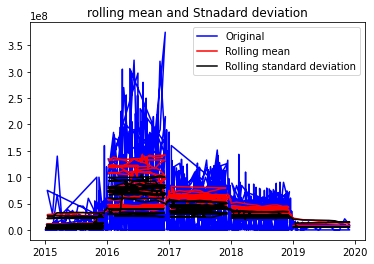

In [282]:
#plot roll statsitics
orig=plt.plot(indexedDataset,color='blue',label="Original")
mean=plt.plot(rolmean,color='red',label="Rolling mean")
std=plt.plot(rolstd,color='black',label="Rolling standard deviation")
plt.legend(loc='best')
plt.title("rolling mean and Stnadard deviation")
plt.show(block=False)

In [283]:
#perform the adfullerdickey test to check the stationarity of the time series
from statsmodels.tsa.stattools import adfuller

print("Results of the dickey fuller test :")
dftest=adfuller(indexedDataset['Withdrawl_Amount'],autolag='AIC')

dfoutput=pd.Series(dftest[0:4],index=['Test Statistics','p-value','#lags Used','Number Of Observations'])
for key,value in dftest[4].items():
    dfoutput['Critical values (%s)'%key]=value
    
print(dfoutput)

Results of the dickey fuller test :
Test Statistics             -1.845152
p-value                      0.358286
#lags Used                  21.000000
Number Of Observations    1503.000000
Critical values (1%)        -3.434708
Critical values (5%)        -2.863465
Critical values (10%)       -2.567795
dtype: float64


C:\softwares\anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


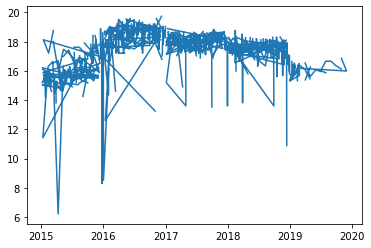

In [284]:
#estiamting a trend
import numpy as np
indexedDataset_logScale=np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

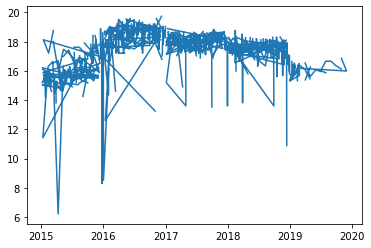

In [285]:
#determining rolling statstic
#rollmean
movingAverage=indexedDataset_logScale.rolling(window=30).mean()
#roll std
movingSTD=indexedDataset_logScale.rolling(window=30).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage,color='red')
plt.plot(movingSTD,color='red')

In [286]:
datasetlogScaleMinusMOvingAverage=indexedDataset_logScale-movingAverage
datasetlogScaleMinusMOvingAverage.head()

#removing Nan Values
datasetlogScaleMinusMOvingAverage.dropna(inplace=True)
datasetlogScaleMinusMOvingAverage.head(10)

,Withdrawl_Amount
Date,


In [287]:
from statsmodels.tsa.stattools import adfuller
def test_stationary(timeseries):
    
    
    #determing the rolling statistic 
    movingAverage=timeseries.rolling(window=12).mean()
    movingstd=timeseries.rolling(window=12).std()
    
    #plot rolling statistic
    orig=plt.plot(timeseries,color='blue',label="Original")
    mean=plt.plot(movingAverage,color='red',label="Rolling mean")
    std=plt.plot(movingstd,color='black',label="Rolling standard deviation")
    plt.legend(loc='best')
    plt.title("rolling mean and Stnadard deviation")
    plt.show(block=False) 
    
    
    #perform adfuller test 
    print("Results of the dickey fuller test :")
    dftest=adfuller(timeseries['Withdrawl_Amount'],autolag='AIC')

    dfoutput=pd.Series(dftest[0:4],index=['Test Statistics','p-value','#lags Used','Number Of Observations'])
    for key,value in dftest[4].items():
        dfoutput['Critical values (%s)'%key]=value
    
    print(dfoutput)

In [288]:
indexedDataset_logScale=indexedDataset_logScale.replace([np.inf, -np.inf], np.zeros)
#indexedDataset_logScale=indexedDataset_logScale.dropna(inplace=True) 

In [289]:
test_stationary(indexedDataset_logScale)

DataError: No numeric types to aggregate

In [ ]:
indexedDataset_logScale.tail

In [ ]:
datasetLogDiffShifting=indexedDataset_logScale-indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

In [ ]:
datasetLogDiffShifting=datasetLogDiffShifting.replace([np.inf, -np.inf], np.nan)
datasetLogDiffShifting=datasetLogDiffShifting.dropna(inplace=True) 
#test_stationary(datasetLogDiffShifting)

In [ ]:
#indexedDataset_logScale=indexedDataset_logScale.replace([np.inf, -np.inf], np.nan)
#indexedDataset_logScale=indexedDataset_logScale.dropna(inplace=True) 

In [ ]:
indexedDataset_logScale


In [ ]:
print(datasetLogDiffShifting)

In [ ]:
import statsmodels.api as sm
decomp = sm.tsa.seasonal_decompose(indexedDataset,period=12)
data = pd.concat([indexedDataset, decomp.trend, decomp.seasonal, decomp.resid], axis=1)
data.columns = ['series', 'trend', 'seasonal', 'resid']

In [ ]:
data

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(indexedDataset ,period=12 )
trend=decomposition.trend
seasonal=decomposition.seasonal 
residual=decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset,label="original")
plt.legend(loc="best")
plt.subplot(412)
plt.plot(trend,label="trend")
plt.legend(loc="best")
plt.subplot(413)
plt.plot(seasonal,label="seasonal")
plt.legend(loc="best")
plt.subplot(414)
plt.plot(residual,label="residual")
plt.legend(loc="best")
plt.tight_layout()

decomposedlogData=residual
decomposedlogData.dropna(inplace=True)

In [ ]:
test_stationary(decomposedlogData)

In [ ]:
decomposedlogData

In [ ]:
from statsmodels.tsa.stattools import acf,pacf
lag_acf= acf (datasetLogDiffShifting)

In [ ]:
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(indexedDataset)),linestyle='--',color='gray')